#**MergeSort**

##1. Descripción del Problema

El ordenamiento de datos es un problema que se sigue estudiando y analizando en la actualidad. Si bien se han encontrado varios algoritmos capaces de resolver este problema utilizando diversos diseños y paradigmas, no todas las soluciones logran mostrar la misma eficiencia, es decir, no son lo suficientemente rápidos en ciertos casos. Por eso, es preferible para resolver un problema de ordenamiento, un algoritmo que logre ahorrar tiempo cuando el tamaño ($n$) de elementos a organizar sea un número muy alto.

---

#### **Entradas y Salidas:**

Para considerar que un programa sea capaz de resolver de forma eficiente el problema anteriormente comentado, primero que nada debe respetar las **entradas** y **salidas** del mismo:

**Entrada**: Serie de n números en una estructura de datos. Ejemplo: $[n_1,n_2,...,n_m]$

**Salida**: Secuencia ordenada en base de los datos de entrada. Por lo que si la salida es un arreglo $[n_1',n_2',...,n_m']$, se cumple que $n_1'\leq n_2' \leq... \leq n_m'$ o $n_1'\ge n_2' \ge... \ge n_m'$.

##2. Descripción del Algoritmo

---

###Divide y Vencerás:

En búsqueda de una mejor eficiencia, es que se han desarrollo diferentes paradigmas para la programación de algoritmos de ordenamiento. Es gracias a ello que se implementó el paradigma de "*Divide y Vencerás*", que permite crear una solución en 3 pasos:

Primero, se recibe un secuencia de $n$ elementos, para luego:
1. **Dividir**: La secuencia se parte en dos subsecuencias de $n/2$ elementos cada una.
2. **Ordenar**: Cada subsecuencia operará de forma recursiva hasta ser ordenada por el algoritmo implementado.
3. **Combinar**: Las dos subsecuencias ordenadas son fusionadas en una para obtener una secuencia ordenada de $n$ números.

Finalmente, se entrega en la salida una secuencia ordenada de menor a mayor con los $n$ elementos originales.

---

###Explicación y Ejemplo del Algoritmo:

Entendiendo ahora el paradigma, es posible describir el algoritmo **MergeSort**, un ejemplo del uso de este paradigma y una buena solución para el problema de eficiencia en el ordenamiento. MergeSort es de tipo "*Divide y Vencerás*", además de que como su nombre lo indica, combinar (Merge) subsecuencias es una parte importante de su implementación. El siguiente ejemplo mostrará como funciona el algoritmo en rasgos generales:

####Ejemplo:

1. Comienza el algoritmo con un arreglo de $n$ números:
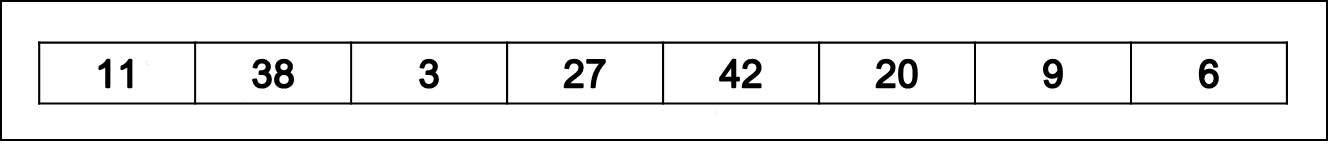

2. El arreglo se separa en 2 sub-arreglos de $n/2$ números:
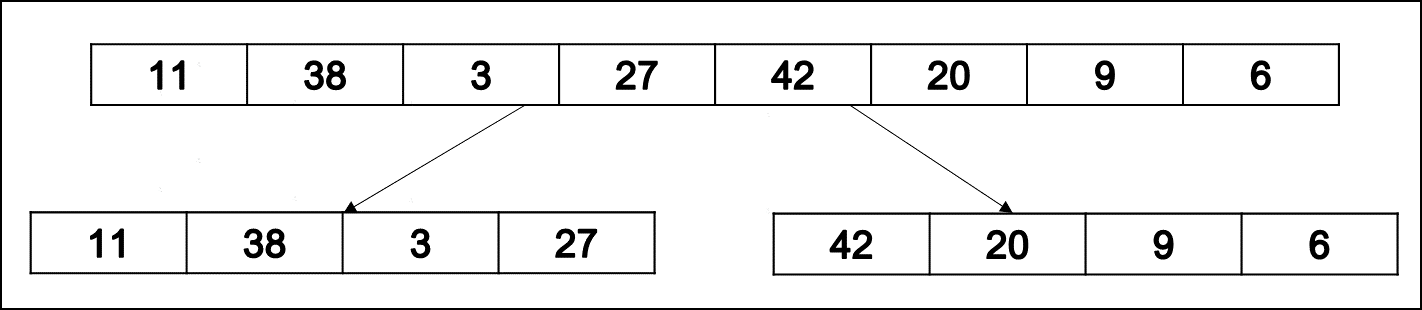

3. Como todavía no es posible asegurar que los elementos de los sub-arreglos estén ordenados, se vuelve a llamar al MergeSort para que los ordene a ambos. El proceso se repite hasta que ya no se puedan dividir los arreglos:
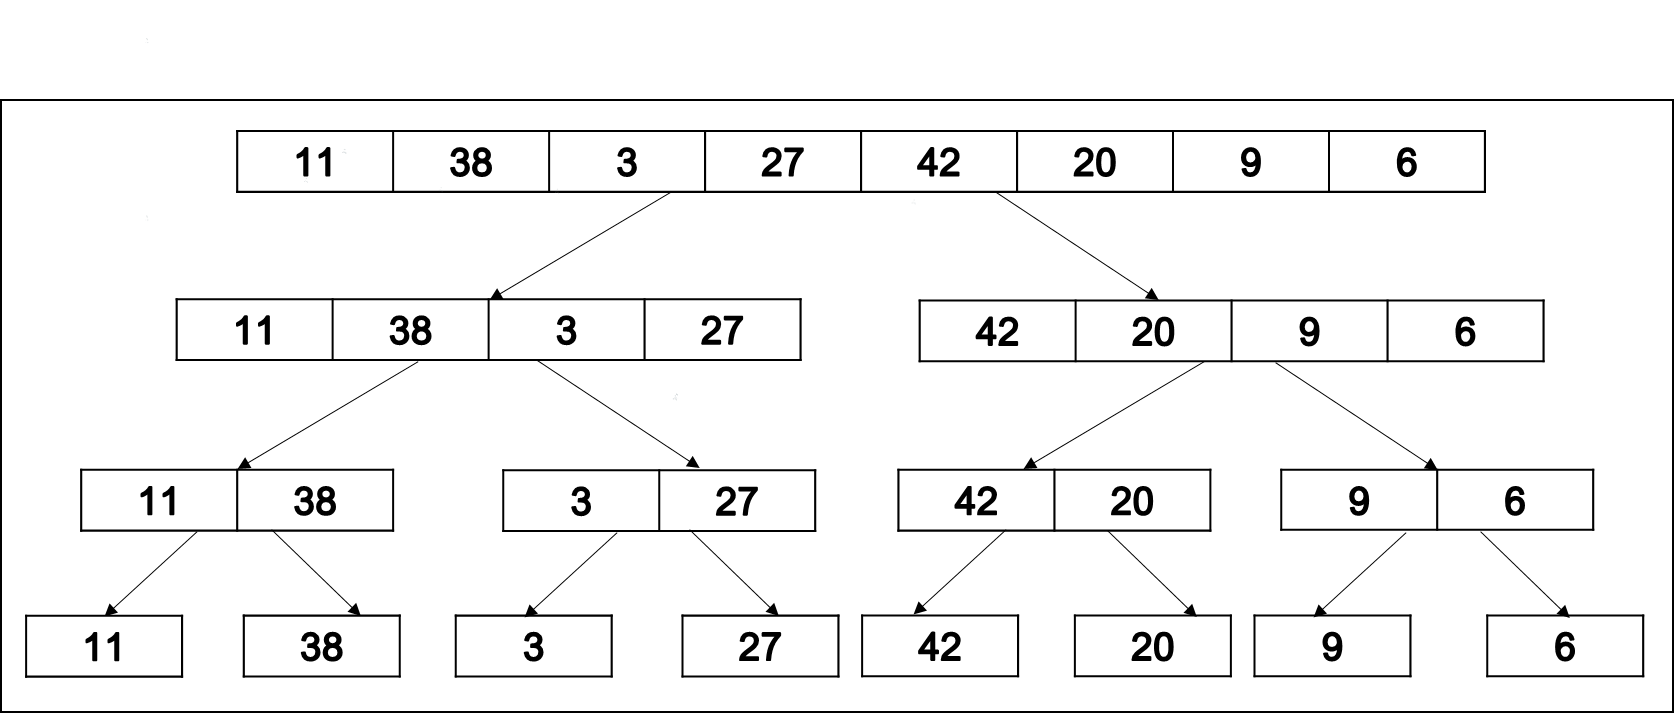

4. Una vez se obtienen arreglos de un elemento, las distintas llamadas a MergeSort ejecutarán un llamado específico a la "**Función Merge**" que se encarga de juntar y ordenar los elementos de 2 sub-arreglos. El orden de ejecución irá desde los sub-arreglos de menor tamaño hasta los de mayor tamaño:
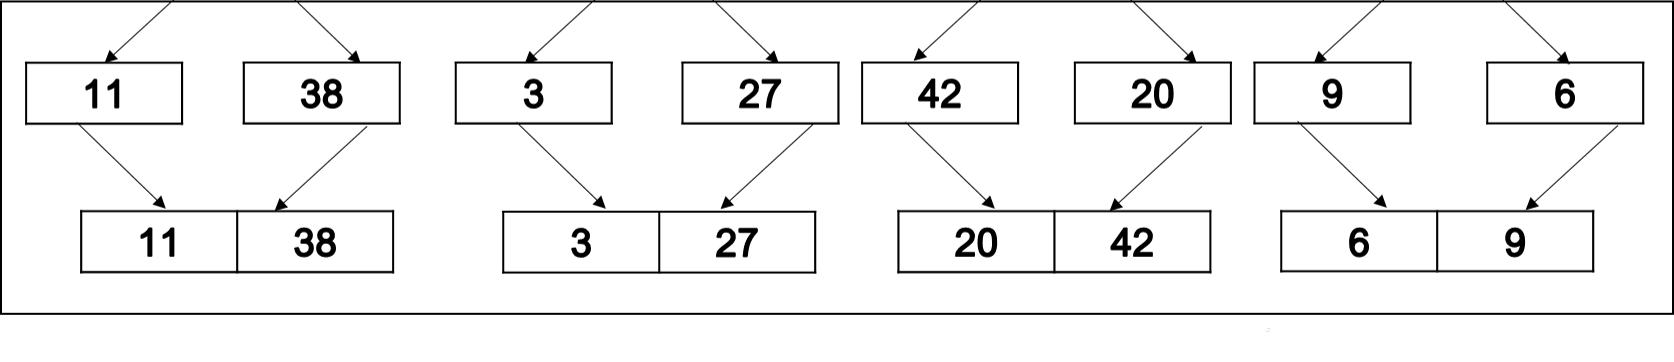

5. Una vez se concretan todos los llamados a la "**función Merge**", MergeSort habrá terminado y retornará el arreglo ordenado:

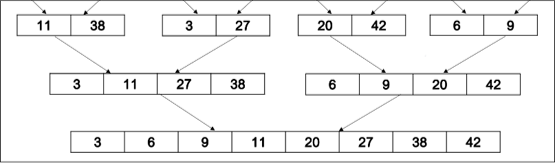




---
###Función Merge:

El algoritmo cumple con su cometido gracias a la "**Función Merge**" que se encarga de ordenar los datos de los 2 sub-arreglos con los que trabaja. Esta función recibe como parámetros el arreglo original más 3 índices: El índice inicial del primer sub-arreglo ($p$), el índice de la posición intermedia ($q$) y el índice final del segundo sub-arreglo ($r$). Aquellos valores permiten definir dentro de la secuencia original a las divisiones $A[p..q]$ y $A[q+1..r]$ que luego serán combinados y se retornarán como un arreglo ordenado $A[p..r]$.

A continuación se detallarán los pasos que sigue la "**Función Merge**" para poder ordenar y combinar sub-arreglos:

1. Se define cada sub-arreglo según sus límites:

          Arreglo de Entrada: A = [4, 5, 6, 8]
          Sub-arreglo 1: Left = [4, 5]
          Sub-arreglo 2: Right = [6, 8]

2. Se comparan los primeros elementos de cada subsecuencia, el menor de ellos se inserta en el primer espacio del arreglo de entrada original. Para ello, se utilizan 3 contadores: $i$, que representa la posición actual en el arreglo $Left$; $j$, que indica la posición en $Right$ y $k$, que indica la posición en el arreglo de salida.

          Left = [*4*,5] --- Right = [*6*,8]
          Left tiene un número menor
          Arreglo de Salida: A = [4,*,*,*]


3. Se avanza un espacio en el sub-arreglo que contenía el número ($i$ += 1 ó $j$ += 1), ahora se tomará en cuenta desde el segundo elemento.

          Left = [4,*5*] --- Right = [*6*,8]

4. Repetir los pasos 2 y 3 hasta que una de las subsecuencias acabe sin elementos ($i$ ó $j$ llegan igualan el largo de un sub-arreglo). Cuando esto ocurra, se agregan los elementos restantes del sub-arreglo que aún tenga datos al arreglo combinado.

          Left tiene un número menor
          Arreglo de Salida: A = [4,5,*,*]
          Left ya no tiene números, por lo que los elementos de Right pasan al arreglo.
          Arreglo de Salida: A = [4,5,6,8]

5. Retornar el arreglo ordenado y combinado.


##3. Implementación del Algoritmo:

Teniendo en cuenta el funcionamiento del algoritmo detallado en el ítem anterior, se muestra a continuación un ejemplo de código para programar el MergeSort.

In [50]:
from termcolor import colored 

#Función Merge.
def Merge(A,p,q,r,verbose):
    
    global comp

    #Definir Sub-Arreglos
    Left = []
    Right = []

    #Definir Tamaño
    sizeL = q - p + 1
    sizeR = r - q

    #Llenar Sub-arreglos
    for i in range (0, sizeL):
      Left.append(A[p+i])
    for j in range (0, sizeR):
      Right.append(A[q+1+j])

    #Definir Variables
    i = 0
    j = 0
    k = p
    
    #Ciclo de Comparaciones entre Sub-arreglos.
    while (i < len(Left) and j < len(Right)):
        if (Left[i] <= Right[j]):
            A[k] = Left[i]
            i += 1
        else:
            A[k] = Right[j]
            j += 1
        k += 1
        comp += 1
    
    #Agregar el resto del arreglo.
    while (i < len(Left)):
        A[k] = Left[i]
        i += 1
        k += 1
        comp += 1

    while (j < len(Right)):
        A[k] = Right[j]
        j += 1
        k += 1
        comp += 1

#Algoritmo MergeSort.
def MergeSort(A, p, r, verbose):
   #Contador de Llamadas Recursivas.
   global cont
   cont += 1

   #Opción Verbose
   if verbose == True:
     print("---------------------------------------")
     print(f"Llamada {cont}:")
     print(f"Arreglo:", colored((A[p:r+1]),"yellow"))
    #  print("---------------------------------------")

   if p==r: 
     if verbose == True:
       print("¡Ya no es posible dividir!")
       print("Retornar el sub-arreglo...\n")
     return #Si la secuencia sólo tiene un elemento, retornar.
   
   #Calcular índice intermedio.
   q = int((p+r)/2) 

   if verbose == True: #Opción Verbose
     print(f"Sub-Arreglo a Ordenar:", colored((A[p:q+1]),"red"))
     print("¡Llamar a MergeSort!")
   MergeSort(A,p,q,verbose) #Ordenar la parte IZQUIERDA del arreglo.

   if verbose == True: #Opción Verbose
     print(f"Sub-Arreglo a Ordenar:", colored((A[q+1:r+1]),"blue"))
     print("¡Llamar a MergeSort!")
   MergeSort(A,q+1,r,verbose) #Ordenar la parte DERECHA del arreglo.

   Merge(A,p,q,r,verbose) #Ordenar y Combinar los sub-arreglos IZQUIERDA Y DERECHA.

#Función que imprime la lista de datos.
def arrayPrinter(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()
    print("=======================================")

# Ejemplo:
data = [11, 38, 3, 27, 42, 20, 6, 9]
print("Arreglo de Entrada:")
arrayPrinter(data)
global comp, cont
comp = cont = 0 #Número de Comparaciones
MergeSort(data, 0, len(data)-1, verbose = False)
print("=======================================")
print("Arreglo de Salida:")
arrayPrinter(data)
print(f"Número de comparaciones: {comp}")
print(f"Número de Llamadas Recursivas: {cont}")

Arreglo de Entrada:
11 38 3 27 42 20 6 9 
Arreglo de Salida:
3 6 9 11 20 27 38 42 
Número de comparaciones: 24
Número de Llamadas Recursivas: 15


Ejecución con `verbose = True`:



In [43]:
# Ejemplo:
data = [11, 38, 3, 27, 42, 20, 6, 9]
print("Arreglo de Entrada:")
arrayPrinter(data)
global comp, cont
comp = cont = 0 #Número de Comparaciones
MergeSort(data, 0, len(data)-1, verbose = True)
print("=======================================")
print("Arreglo de Salida:")
arrayPrinter(data)
print(f"Número de comparaciones: {comp}")
print(f"Número de Llamadas Recursivas: {cont}")

Arreglo de Entrada:
11 38 3 27 42 20 6 9 
---------------------------------------
Llamada 1:
Arreglo: [11, 38, 3, 27, 42, 20, 6, 9]
Sub-Arreglo a Ordenar: [11, 38, 3, 27]
¡Llamar a MergeSort!
---------------------------------------
Llamada 2:
Arreglo: [11, 38, 3, 27]
Sub-Arreglo a Ordenar: [11, 38]
¡Llamar a MergeSort!
---------------------------------------
Llamada 3:
Arreglo: [11, 38]
Sub-Arreglo a Ordenar: [11]
¡Llamar a MergeSort!
---------------------------------------
Llamada 4:
Arreglo: [11]
¡Ya no es posible dividir!
Retornar el sub-arreglo...

Sub-Arreglo a Ordenar: [38]
¡Llamar a MergeSort!
---------------------------------------
Llamada 5:
Arreglo: [38]
¡Ya no es posible dividir!
Retornar el sub-arreglo...

Sub-Arreglo a Ordenar: [3, 27]
¡Llamar a MergeSort!
---------------------------------------
Llamada 6:
Arreglo: [3, 27]
Sub-Arreglo a Ordenar: [3]
¡Llamar a MergeSort!
---------------------------------------
Llamada 7:
Arreglo: [3]
¡Ya no es posible dividir!
Retornar el s

##4. Propiedades del Algoritmo:

En esta sección se explicarán y demostrarán algunas propiedades importantes del algoritmo MergeSort:

---
###Correctitud de Merge:
Para demostrar la correctitud de la "**Función Merge**" se utilizará la propiedad de bucle invariante. Para ello, se declara el siguiente Teorema:

-  Al inicio de cada iteración (antes de entrar a los bucles), el arreglo $A[p..k-1]$ contendrá de forma ordenada a los $k - p$ elementos más pequeños de los sub-arreglos $Left[0..q-p+1]$ y $Right[0..r-q]$. Además, es posible declarar que $Left[i]$ y $Right[j]$ son los elementos más pequeños de sus sub-arreglos respectivos que no han sido traspasados al arreglo "original".

Se deben deben tomar en cuenta las siguientes definiciones:
- $p$ = índice inicial del arreglo A de entrada.
- $q$ = índice intermedio del arreglo A de entrada.
- $r$ = índice final del arreglo A de entrada.
- $i$ = indicador de posición en el sub-arreglo $Left$.
- $j$ = indicador de posición en el sub-arreglo $Right$.
- $k$ = indicador de posición en el arreglo A de salida.

Para comprobar que la propiedad de bucle invariante es correcta, es necesario que el algoritmo cumpla con las pruebas de **inicialización** y **mantención** características de la propiedad. Para explicar esto, se utilizará el siguiente ejemplo de una llamada a **Merge**:

1. Se tomará un arreglo de entrada (A) que formará 2 sub-arreglos $Left[0..q-p+1]$ y $Right[0..r-q]$. Se puede visualizar en la imagen que los elementos de Left y Right ya están ordenados.
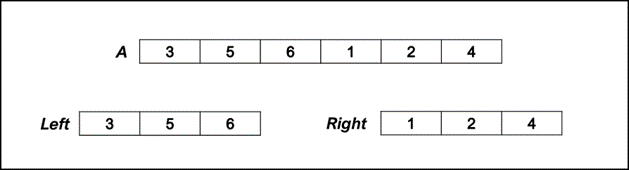

2. Definir los valores iniciales de las variables [$i, j, k$]. Con esto ya hecho, es posible aplicar la prueba de **inicialización**.

  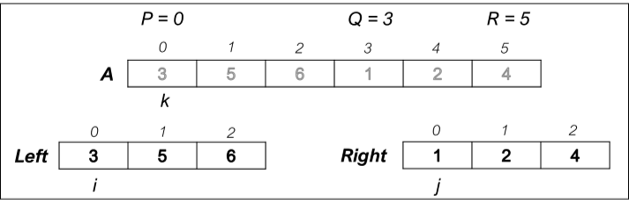

  Antes de la primera iteración del bucle de comparaciones, se tiene que $k = p$, lo que genera que el arreglo $A[p..k-1]$ de salida prácticamente no considere ningún elemento. Al ser así el caso, este arreglo contendría en teoría los $k - p = 0$ elementos más pequeños de $Left$ y $Right$. Relacionado con lo anterior, también se puede confirmar al ser $i = j = 0$, que $Left[i] = 3$ y $Right[j] = 1$ son los primeros y más pequeños números de sus sub-arreglos.

3. Para la prueba de **mantención**, resulta necesario realizar un par de iteraciones para ver los dos casos posibles que emergen de una comparación.
Estos casos son: $Left[i] < Right[j]$ y $Right[j] < Left[i]$.

  En la imagen anterior, la variable simbólica **iteración** muestra respectivamente como quedan $A$, $Left$ y $Right$ después de recorrer el primer ciclo de comparaciones durante la cantidad especificada en la misma variable. Esto permite comprobar que, con el pasar de las iteraciones, los valores definidos $i, j$ y $k$ cambian sus valores, y con ello, $Left$, $Right$ y $A$ varían constantemente en cada ciclo. Además cabe destacar que cada variación y cambio de valor permite que la función cumpla con la propiedad, ya que se puede observar que:
  
  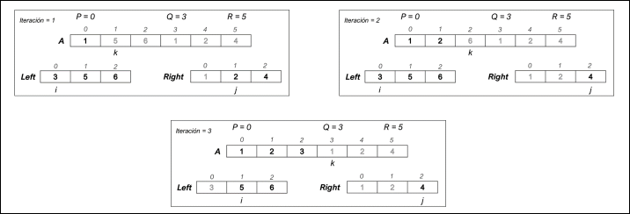
  - Durante la iteración 1, se comparan los elementos $Left[i] = 3$ y $Right[j] = 1$, al resultar el segundo como más pequeño, este es transferido al arreglo $A$ en la posición $k = 0$. Luego, se avanzó una posición en $j$ y $k$. Se cumple con el teorema propuesto, ya que los $k - p = 1$ elementos de menor valor están ordenados en el arreglo $A$, y además, $Right[j] = 2$ pasa a ser el elemento de menor tamaño en $Right$ que no ha sido traspasado.
  - En la iteración 2, ocurre un procedimiento similiar, dejando a $Left$ intacto y transfiriendo a $Right[j] = 2$ a $A[k]$, con $k = 1$. La propiedad continúa cumpliéndose.
  - Por último, en la iteración 3 se muestra el caso contrario: $Left[i] < Right[j]$. Sin embargo, se sigue cumpliendo la propiedad: $k - p = 3$, y los 3 primeros elementos de $A$ continuan siendo elementos $Left$ y $Right$ ordenados. También al avanzar $i$ de posición, $Left[i] = 5$ será el elemento más pequeño del sub-arreglo que no haya sido traspasado. 

  Teniendo en cuenta que la propiedad se sigue cumpliendo a medida que van pasando las iteraciones, se concluye que la función pasa la prueba de mantención.

4. Cuando el sub-arreglo $Right$ se queda sin elementos para comparar, entonces se procede a agregar cada elemento de $Left$ a $A$.
  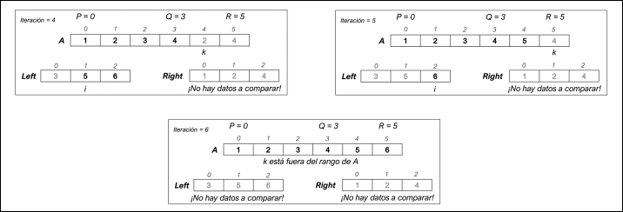
5. El ejemplo concluye de forma exitosa mostrando un arreglo $A$ ordenado con los valores originales de $Left$ y $Right$.

  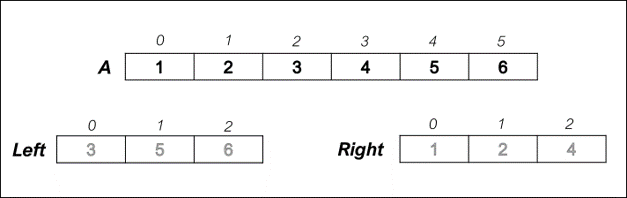
  
    



---
###Correctitud de MergeSort:
Resulta necesario que la función MergeSort opere de forma correcta, puesto que al ser recursiva, un mal planteamiento en su lógica podría ser fatal para la operación. Para comprobar la correctitud del algoritmo se utilizará **inducción matemática**:

- **Hipótesis $P(n)$:** El algoritmo recursivo MergeSort retorna siempre un arreglo de $n$ números ordenados de menor a mayor.

**Caso Base** -> $P(1)$:
Cuando $n = 1$ sólo hay un elemento en el arreglo. En este caso el código del algoritmo devuelve un arreglo de tamaño 1 con el único elemento, el cual se infiere que está ordenado.

```
#Algoritmo MergeSort.
def MergeSort(A, p, r, verbose):
   if p==r: # con n = 1: p = 0, r = 0 
     return #Si la secuencia sólo tiene un elemento, retornar.
     (...)
```
**Paso Inductivo** -> $P(m)$ con $m < n$:
Para probar el paso inductivo, se comienza con el caso $P(n)$. Aquí MergeSort divide los $n$ elementos en dos sub-arreglos de tamaño $m=n/2$, estos sub-arreglos continuarán dividiéndose de forma recursiva hasta que lleguen al caso base ($m = 1$). Será entonces cuando la función Merge se encargue de ordenarlas paso a paso, eventualmente llegando a tener 2 sub-arreglos de tamaño $m$ ordenados, comprobando la hipótesis.

```
#Algoritmo MergeSort.
def MergeSort(A, p, r, verbose):
   if p==r: 
     return #Si la secuencia sólo tiene un elemento, retornar.
   #Calcular índice intermedio.
   q = int((p+r)/2) 
   MergeSort(A,p,q,verbose) #Ordenar la parte IZQUIERDA del arreglo.
   MergeSort(A,q+1,r,verbose) #Ordenar la parte DERECHA del arreglo.
   Merge(A,p,q,r,verbose) #Ordenar y Combinar los sub-arreglos IZQUIERDA Y DERECHA.
```
Con la hipótesis comprobada, se establece que el algoritmo MergeSort es correcto.

---
###Tiempo de Ejecución de MergeSort:
Para describir el tiempo de ejecución del algoritmo, se utilizará una *ecuación recurrente*. El análisis se lleva a cabo de la siguiente manera:

- Tiempo en función de la cantidad de elementos $n$ = $T(n)$
- Si $n$ es menor que $c$, siendo c una constante de valor bajo (como 1 por ejemplo), entonces $T(n) = O(1)$.
- En el caso de que $n$ mayor que $c$ se deben tomar en cuenta los sub-problemas a tratar, el tiempo requerido para dividir un problema y el tiempo necesario para combinar las soluciones:
  - El problema deberá separarse en sub-problemas de menor tamaño, en este caso, MergeSort separa el arreglo original en 2 sub-arreglos de tamaño n/2, lo que equivale a $2T(n/2)$
  - El algoritmo no emplea mayores operaciones para separar el arreglo, por lo que se agregaría $O(1)$.
  - La función Merge debe recorrer todos los elementos de los sub-arreglos de tamaño $n/2$ una vez, por lo que se agrega $O(n)$ a la ecuación.
  
  Bajo estos tiempos, la ecuación queda $T(n) = 2T(n/2) + O(1) + O(n)$, pero bien se puede considerar el tiempo de dividir y el de combinar como $O(1) * O(n)$ que reemplazando por constantes representativas dejaría la ecuación como: $T(n) = 2T(n/2) + c*n$.

En resumen, el tiempo de ejecución varía según la cantidad de elementos, pero se considerará para el análisis del algoritmo la ecuación $T(n) = 2T(n/2) + c*n$.

**Prueba de Complejidad**:

Teniendo la ecuación que describe el tiempo, ahora se hará uso de un **árbol de recurrencia** para enseñar como se obtiene la complejidad temporal del peor caso:

- El árbol de recurrencia se encarga de mostrar cada paso de la sub-división del problema. La siguiente imagen muestra como separa el primer problema de complejidad $T(n)$ en dos sub-problemas de complejidad $T(n/2)$ dejando por resolver la combinación de soluciones de complejidad $c * n$.
  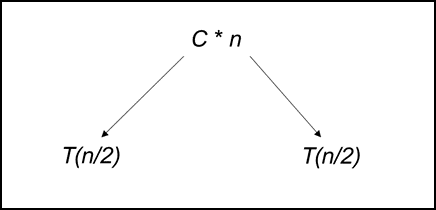

- El siguiente paso será extender el árbol de recurrencia, para que muestre como funciona en teoría el algoritmo:

  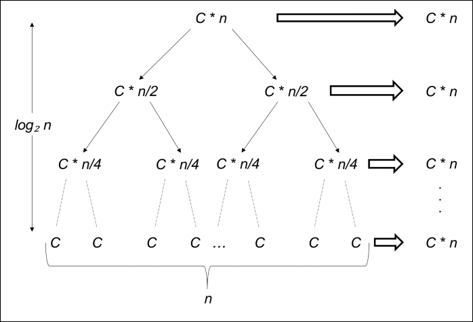
- Se puede concluir a partir de la imagen:
  - Que el problema inicial debe dividirse un total de $log_2(n)$ para alcanzar sub-problemas constantes
  - Que para combinar las soluciones de cada división se necesitará un total de $c * n$ operaciones.

Por úlitmo, utilizando las herramientas para calcular la complejidad de un algoritmo y los datos que entrega el árbol de recurrencia, se puede afirmar que la complejidad temporal del MergeSort es de $T(n)=log_2(n)$ divisiones $* n$ elementos recorridos, o en notación: $O(n*log(n))$.








##5. Experimentos:
En razón de culminar el análisis hecho, se presentarán una serie de experimentos realizados con el objetivo de probar las características del algoritmo MergeSort:

---

###Comparación con el Mejor y Peor Caso:
Para analizar más en detalle el número de comparaciones que se generan en el algoritmo, se utilizará un gráfico para comparar los siguientes 3 casos:
- Cantidad de comparaciones en el *Mejor Caso* $[O(n*log(n))]$.
- Cantidad de comparaciones en el *Peor Caso* $[O(n*log(n))]$.
- Cantidad de comparaciones con una entrada aleatoria de elementos.

El siguiente código creará entradas para ordenar que tengan entre 5 y 30 números. Los números de cada entrada varían entre 1 y 50.

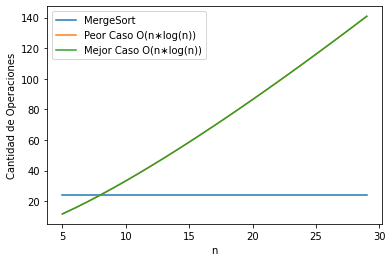

In [47]:
import matplotlib.pyplot as plt
from math import log2
import random

x=[n for n in range(5,30)] 
y1=[n * log2(n) for n in range(5,30)] # worst case
y2=[n * log2(n) for n in range(5,30)] # best case
y=[]; 

for n in range(5,30):
  comp = 0
  a = random.sample(range(1, 50), n)
  MergeSort(data, 0, len(data)-1,verbose = False)
  y.append(comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor Caso O(n∗log(n))","Mejor Caso O(n∗log(n))"])

plt.xlabel('n')
plt.ylabel('Cantidad de Operaciones')
plt.show()

**Análisis**: Los resultados obtenidos por MergeSort oscilan entre el peor y mejor caso.

**Explicación**: Los resultados prueban que la complejidad del algoritmo es de $O(n*log(n))$. Por eso oscila la línea representativa de MergeSort a sus "Mejor y Peor Caso".

###Comparación entre MergeSort e InsertionSort:
El principal experimento a mostrar es la comparación de algoritmos de ordenamiento. En este caso, se utilizará el método de InsertionSort ordenar arreglos con números aleatorios que tengan entre 25 y 500 elementos.

A continuación se presenta el código del InsertionSort a utilizar:

In [37]:
#Función Insertion Sort
def insertionSort (a, comp, verbose):
  for i in range (1, len(a)):
    #Definir Dato Clave o Pivote.
    key = a[i]
    #Ciclo para Encontrar la Posición del Dato Clave.
    for k in range (i-1, -1, -1):
      #Contador de Comparaciones.
      comp += 1
      #Condición que Verifica si el número Clave está en su posición correcta.
      if a[k] < key:
        break
      #Intercambiar de posición los números comparados.
      a[k+1] = a[k]
      a[k] = key
  return a, comp #Devolver el Arreglo Ordenado y el Número de Comparaciones realizadas.

El siguiente trozo de código creará una gráfica que comparará ambos métodos de ordenamiento:

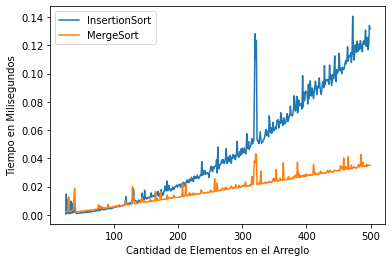

In [40]:
import datetime
from timeit import repeat

x=[]; y=[]
x1=[]; y1=[]

for n in range(25,500):

  a = random.sample(range(1, 500), n)

  num = 0
  MergeSort(data, 0, len(data)-1, verbose = False)
  verbose = False
  #La función repeat ejecuta 20 veces los algoritmos de ordenamiento con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a},{num},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{num},{len(a)-1},{verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  x1.append(n)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["InsertionSort","MergeSort"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

**Análisis**: Se puede observar la clara diferencia entre los 2 algoritmos de ordenamiento. Aunque cabe destacar que ambos métodos estuvieron a la par cuando se trataba de ordenar arreglos de menor tamaño, se puede apreciar que MergeSort le saca bastante ventaja a InsertionSort a medida va aumentando la cantidad de elementos a ordenar. También se aprecian ciertos *picks* de tiempo en ambos métodos.

**Explicación**: La complejidad temporal de cada algoritmo pesa fuerte en el resultado de la gráfica, MergeSort tiene una complejidad $O(n*log(n))$ que supera especialmente en casos donde el arreglo es de mayor tamaño al método de InsertionSort, con una complejidad $O(n^2)$. Los *picks* de tiempo podrían explicarse por ciertos casos que necesitaron mayor procesamiento de datos, o bien por un factor de la máquina que graficaba aquellos.